In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load the data
df = pd.read_csv('Churn.csv')
df.head()

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [3]:
df.isnull().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

Churn
No     5175
Yes    1869
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_18964\3692906581.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data = df, palette='coolwarm')


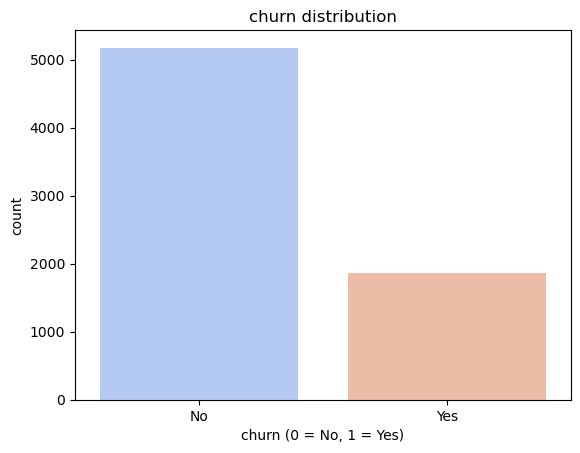

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data = df, palette='coolwarm')
plt.title('churn distribution')
plt.xlabel('churn (0 = No, 1 = Yes)')
plt.ylabel('count')
plt.show()

In [9]:
#Handling missing values and incorrect values
import warnings
warnings.filterwarnings('ignore')
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')
df['Total Charges'].fillna(df['Total Charges'].median(),inplace=True)

In [10]:
#Handling categorical variables 
import warnings
warnings.filterwarnings('ignore')

labelencoder = LabelEncoder()
categorical_cols = ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Streaming TV', 'Streaming Movies', 'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method','Churn']
for col in categorical_cols:df[col] = labelencoder.fit_transform(df[col])

In [ ]:
X = df.drop(['CustomerID', 'Churn'], axis = 1)

y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Feature Scaling


In [26]:
# Drop irrelevant columns (e.g., customerID)
df = df.drop(['Customer ID'], axis=1)

In [27]:
# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Churn':
        df[col] = LabelEncoder().fit_transform(df[col])

In [28]:
# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [29]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [30]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
print(X.dtypes)

Gender                 int32
Senior Citizen         int64
Partner                int32
Dependents             int32
tenure                 int64
Phone Service          int32
Multiple Lines         int32
Internet Service       int32
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract               int32
Paperless Billing      int32
Payment Method         int32
Monthly Charges      float64
Total Charges          int32
dtype: object


In [33]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7248 - loss: 0.5275 - val_accuracy: 0.7500 - val_loss: 0.4829
Epoch 2/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4276 - val_accuracy: 0.7571 - val_loss: 0.4851
Epoch 3/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8033 - loss: 0.4163 - val_accuracy: 0.7553 - val_loss: 0.4755
Epoch 4/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4082 - val_accuracy: 0.7677 - val_loss: 0.4719
Epoch 5/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.3981 - val_accuracy: 0.7713 - val_loss: 0.4776
Epoch 6/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8012 - loss: 0.4059 - val_accuracy: 0.7571 - val_loss: 0.4845
Epoch 7/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8191 - loss: 0.4041 - val_accuracy: 0.7677 - val_loss: 0.4815
Epoch 8/10
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.3803 - val_accuracy: 0.

In [35]:
# Evaluate and predict
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

predictions = model.predict(X_test[:5])
print("Predictions (0 = No churn, 1 = Churn):")
print(predictions)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7920 - loss: 0.4170
Test Accuracy: 0.79
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predictions (0 = No churn, 1 = Churn):
[[0.4841005 ]
 [0.08369423]
 [0.45144758]
 [0.5625181 ]
 [0.30580667]]


In [36]:
# Save the model
model.save("churn_model.h5")
print("Model saved as churn_model.h5")


Model saved as churn_model.h5


In [37]:
# Reload and test the model
loaded_model = tf.keras.models.load_model("churn_model.h5")
reloaded_preds = loaded_model.predict(X_test[:5])
print("Reloaded model predictions:")
print(reloaded_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Reloaded model predictions:
[[0.4841005 ]
 [0.08369423]
 [0.45144758]
 [0.5625181 ]
 [0.30580667]]
